

# **TASK 6:PREDICTION USING DECISION TREE ALGORITHM**
# (BY Priyanka Priyadarshini Mohanty)

**For the given 'iris' dataset, create the decision tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it will be able to predict the right class accordingly.**

# A) IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier

# B)LOADING DATA

In [2]:
data=pd.read_csv(r'Iris.csv')

# C)DEDUCING DATA

#### Finding no. of rows and columns

In [3]:
data.shape

(150, 6)

#### Listing all the columns

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### First 5 rows

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Last 5 Rows

In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Dropping column 'Id'

It can be inferred from the dataset that column Id does not affect the target value
So we need to drop it.  

In [7]:
data=data.drop(['Id'],axis=1)

#### Data Description

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Thus there are no null values present in the dataset.

# D) EDA

#### PIE CHART

In [10]:
data['Species'].value_counts()                       #calculating the no of species in each category.

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

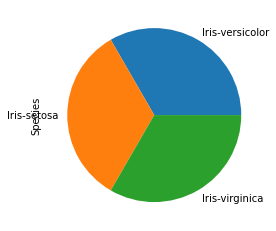

In [11]:
data.Species.value_counts().plot.pie()

#### PAIRPLOT

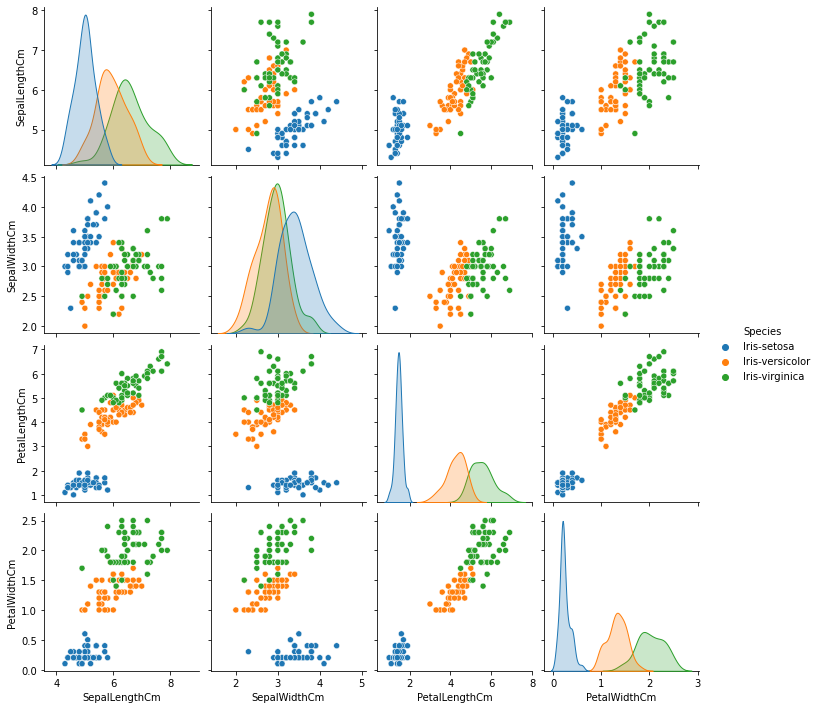

In [12]:
sns.pairplot(data,hue='Species')                         #representing the relation between the independent  features using pairplot.

#### DATA CORRELATION

In [13]:
corr=data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### CORRELATION PLOT

[]

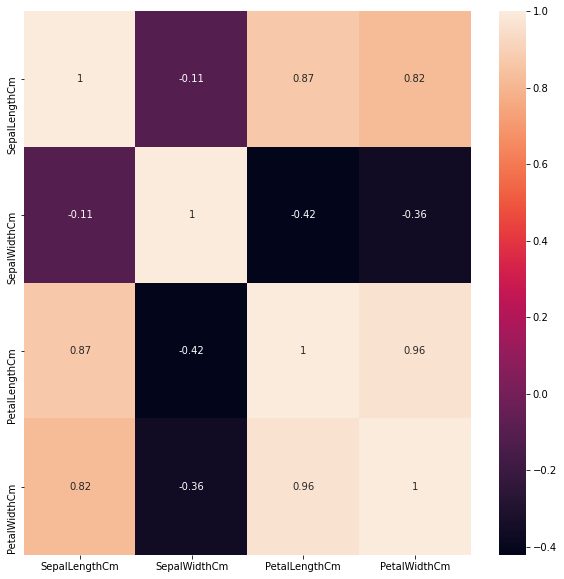

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.plot()

# E)MODEL BUILDING

Before training the model, we need to label encode the target value.

#### Label Encoding.

In [15]:
data['Species'] = data['Species'].replace(['Iris-virginica', 'Iris-setosa','Iris-versicolor'],[0,1,2])

In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Training the model.

In [17]:
X=data.iloc[:, : -1]
y=data.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")

Training Complete.


### Predicting target value for test data.

In [19]:
y_pred = tree_classifier.predict(X_test)

### Comparing the actual and predicted values.

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
14,1,1
98,2,2
75,2,2
16,1,1
131,0,0
56,2,2
141,0,0
44,1,1
29,1,1
120,0,0


### Prediction For Custom Input.

In [21]:

print("Estimating Class Probabilities for flower whose petals length width are 6cm and 4cm and sepal length and width are 3cm and 4cm. ")
print()
output=tree_classifier.predict([[6, 4, 3, 4]])
if output==0:
  print("The species is 'Iris-virginica'")
elif output==1:
  print("The species is 'Iris-setosa'")
else:
  print("The species is 'Iris-versicolor'")


Estimating Class Probabilities for flower whose petals length width are 6cm and 4cm and sepal length and width are 3cm and 4cm. 

The species is 'Iris-versicolor'


### Visualizing the decision tree.

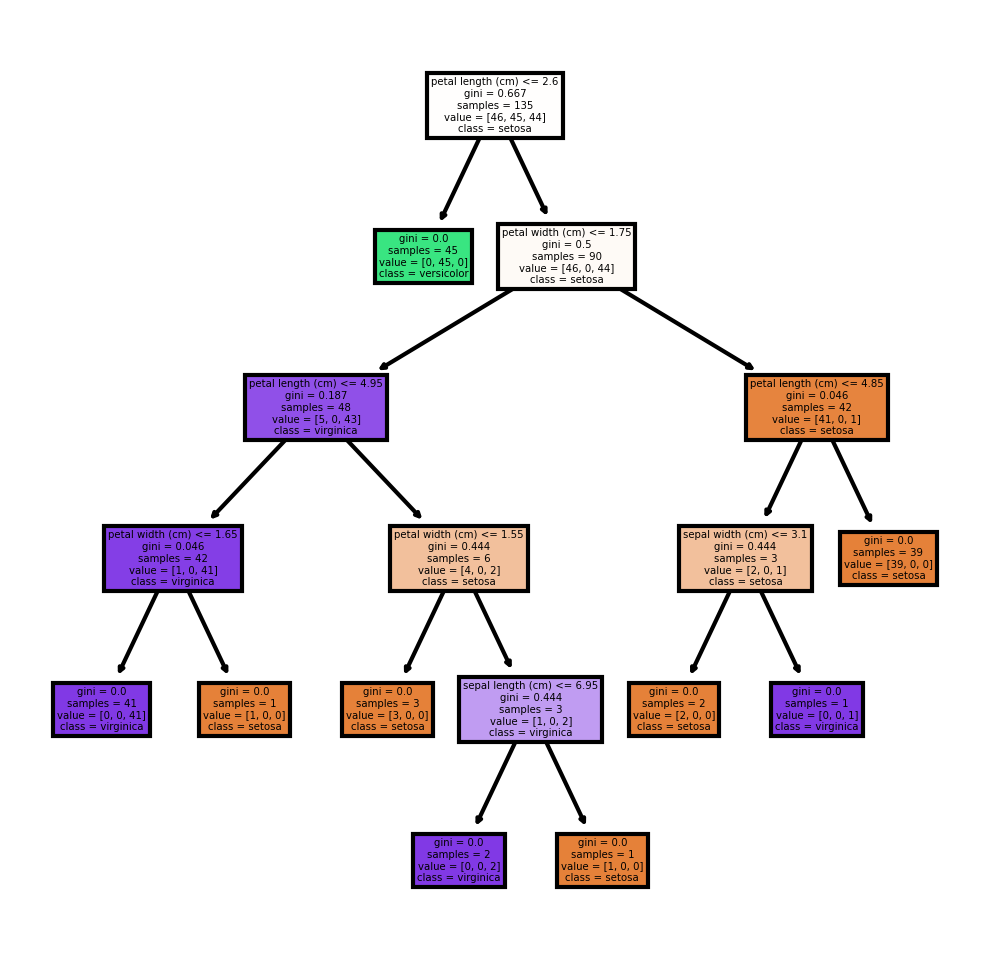

In [22]:

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### Evaluating the model.

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have chosen the accuracy score. There are many such metrics.

In [23]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


# E) CONCLUSION
For the given Iris dataset I created the Decision tree classifier and visualized it graphically.
 The accuracy score turned out to be 1 and when new data was fed to the model it predicted the class correctly.